In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import math
import datetime
import platform

## Loading MNIST Dataset

In [2]:
mnist_dataset = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist_dataset.load_data()          # data loaded in the form of array

In [3]:
print('Type of x_train:',type(x_train))
print('Dimension of x_train:',x_train.ndim)
print('Shape of x_train is ',x_train.shape)

Type of x_train: <class 'numpy.ndarray'>
Dimension of x_train: 3
Shape of x_train is  (60000, 28, 28)


In [4]:
print('Shape of x_train is ',x_train.shape)
print('Shape of y_train is ',y_train.shape)
print('Shape of x_test is ',x_test.shape)
print('Shape of y_test is ',y_test.shape)

Shape of x_train is  (60000, 28, 28)
Shape of y_train is  (60000,)
Shape of x_test is  (10000, 28, 28)
Shape of y_test is  (10000,)


### let us explore the data 

In [5]:
pd.DataFrame(x_train[7]) # taking out just one digit

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,253,253,174,6,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,43,...,252,252,252,158,14,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,178,...,252,252,252,252,59,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,109,...,252,252,252,252,59,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,4,...,226,252,252,172,7,0,0,0,0,0


### Plotting the matrix number

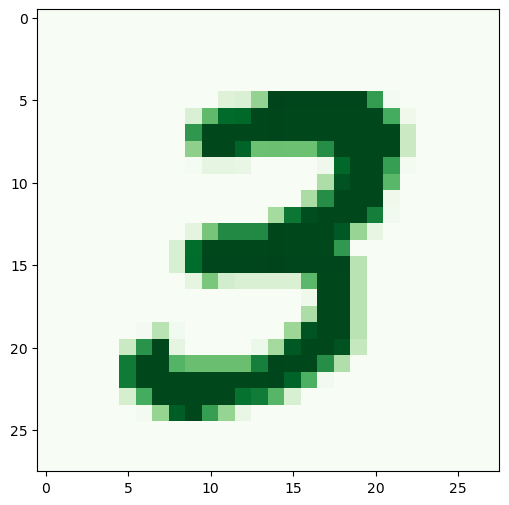

In [6]:
plt.figure(figsize=(6, 6))
plt.imshow(x_train[7],cmap='Greens')  # plt.imshow() shows pixel density
plt.show()

<Axes: >

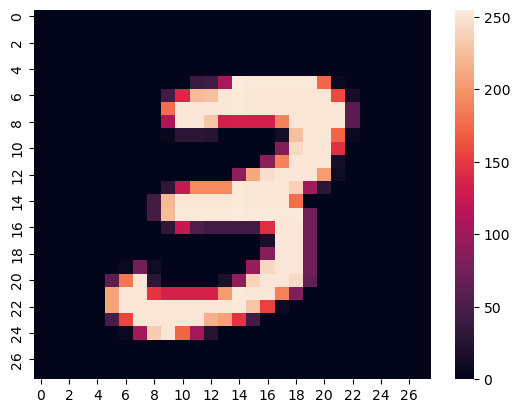

In [7]:
sns.heatmap(pd.DataFrame(x_train[7]))        # Another way of visualizing the number 

#### Plot some digits from the top

5


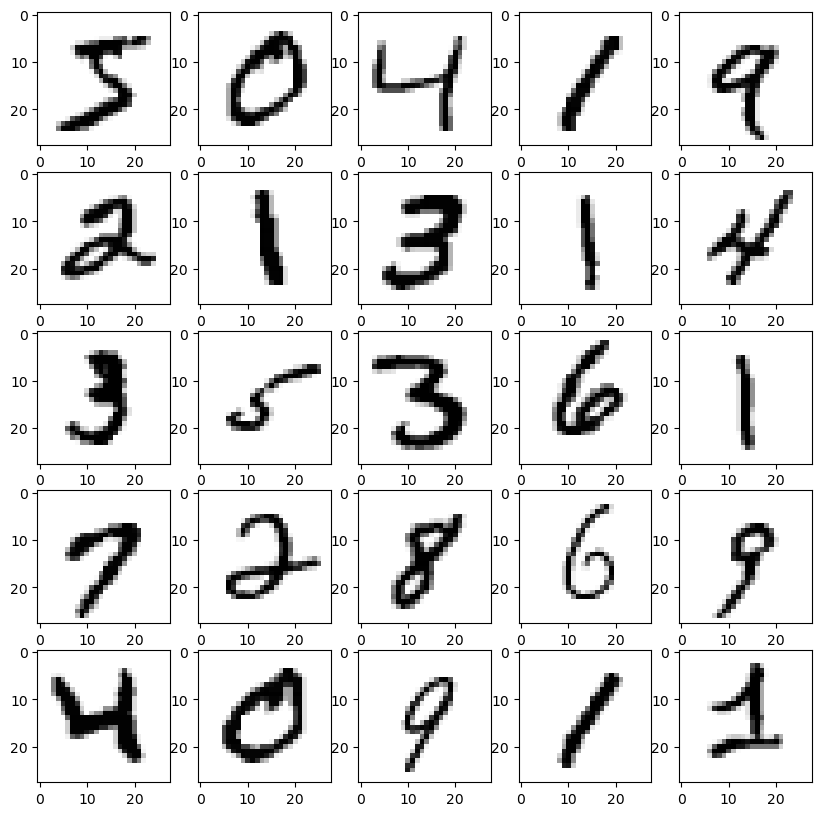

In [8]:
n=20
num_cells = math.ceil(math.sqrt(n))
print(num_cells)
plt.figure(figsize=(10,10))

for i in range(num_cells*num_cells):
    plt.subplot(num_cells,num_cells,i+1)         # plt.subplots(rows,columns,index)
    plt.imshow(x_train[i],cmap=plt.cm.binary)
    
plt.show()

### Normalize the data ( move range from **[0-255]** to [0-1] )

In [9]:
x_train_normalized = x_train/255
x_test_normalized = x_test/255

In [10]:
x_train_normalized.min(),x_train_normalized.max()

(0.0, 1.0)

#### Before normalization

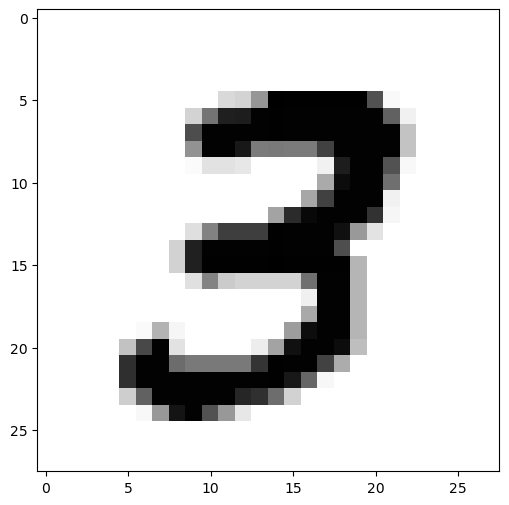

In [11]:
plt.figure(figsize=(6, 6))
plt.imshow(x_train[7],cmap=plt.cm.binary)  # plt.imshow() shows pixel density
plt.show()

#### After Normalization

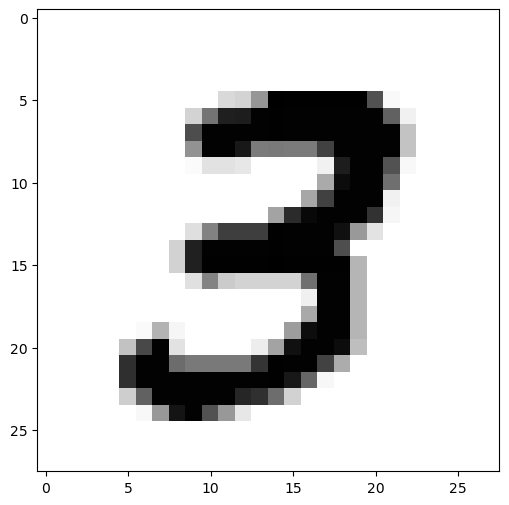

In [12]:
plt.figure(figsize=(6, 6))
plt.imshow(x_train_normalized[7],cmap=plt.cm.binary)
plt.show()

# Build the Model

### 3 Layers  Network Architecture

**Layer 0** -> **Flatten Layer** ( it will flatten image 2D matrix into 1D vector ) 

**Layer 1** -> **INPUT Dense Layer** ( with 128 neurons and **ReLU activation** function ) 

**Layer 2** -> **HIDDEN Dense Layer** ( with 128 neurons and **ReLU activation** function ) 

**Layer 3** -> **OUTPUT Dense Layer** ( with 10 **Softmax outputs** ) . 
           The output represents the network guess . 
           The 0-th output represents a probability that the input digit is 0 , the 1-st output represents a probability that              the input digit is 1 and so on ...
           
           
           
**NOTE** ->> WE WILL USE **kernel_regularizer** PARAMETER OF THE LAYER TO CONTROL OVERFITTING OF THE MODEL . 
            *Another common approach might be to use **dropout layers** .*

In [13]:
model = tf.keras.Sequential()
# Sequential gives a linear stack of layers where each layer's output is input to the next layer .


### Flattened LAYER
model.add(tf.keras.layers.Flatten(input_shape= x_train_normalized.shape[1:]))       # Data processing step

### INPUT LAYER
model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu,
    kernel_regularizer =tf.keras.regularizers.l2(0.002)))

### HIDDEN LAYER 
model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu,
    kernel_regularizer =tf.keras.regularizers.l2(0.002)))

### OUTPUT LAYER
model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax))



C:\Anaconda\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.summary() # Parameters = weights + biases

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

### Compile the Model 

In [15]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer = adam_optimizer,
    loss = tf.keras.losses.sparse_categorical_crossentropy,
    metrics = ['accuracy'])   # default batchsize is 32 which is also standard


### Train the Model

In [32]:
training_hist = model.fit(
    x_train_normalized ,
    y_train , 
    epochs=18 ,
    validation_data=( x_test_normalized, y_test))

Epoch 1/18
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9757 - loss: 0.1550 - val_accuracy: 0.9646 - val_loss: 0.1934
Epoch 2/18
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9727 - loss: 0.1632 - val_accuracy: 0.9710 - val_loss: 0.1758
Epoch 3/18
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9755 - loss: 0.1549 - val_accuracy: 0.9717 - val_loss: 0.1723
Epoch 4/18
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9757 - loss: 0.1563 - val_accuracy: 0.9711 - val_loss: 0.1728
Epoch 5/18
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9744 - loss: 0.1609 - val_accuracy: 0.9688 - val_loss: 0.1855
Epoch 6/18
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9738 - loss: 0.1592 - val_accuracy: 0.9743 - val_loss: 0.1596
Epoch 7/18
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9751 - loss: 0.1568 - val_accuracy: 0.9671 - val_loss: 0.1884
Epoch 8/18
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9741 - loss: 0.1587 - 

### Plotting the accuracy and loss function charts against epochs

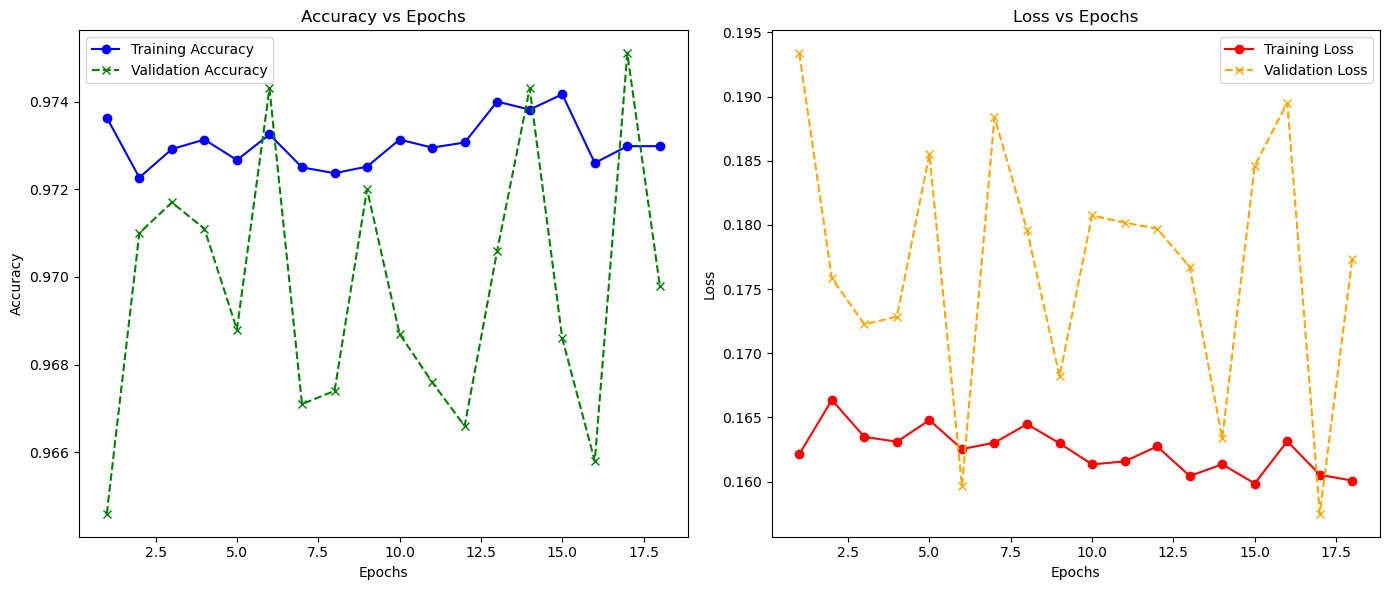

In [33]:
# Extract history data from the training process
train_loss = training_hist.history['loss']
val_loss = training_hist.history['val_loss']
train_accuracy = training_hist.history['accuracy']
val_accuracy = training_hist.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)  # Number of epochs

# Create subplots for accuracy and loss
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot training and validation accuracy
ax1.plot(epochs, train_accuracy, label='Training Accuracy', color='blue', marker='o')
ax1.plot(epochs, val_accuracy, label='Validation Accuracy', color='green', linestyle='--', marker='x')
ax1.set_title('Accuracy vs Epochs')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot training and validation loss
ax2.plot(epochs, train_loss, label='Training Loss', color='red', marker='o')
ax2.plot(epochs, val_loss, label='Validation Loss', color='orange', linestyle='--', marker='x')
ax2.set_title('Loss vs Epochs')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

# Display the plots
plt.tight_layout()
plt.show()

### Writing the module for taking input as a hand written digit and convert it into the desirable array form .

In [34]:
from PIL import Image
import cv2

def preprocess_handwritten_digit(image_path):
   
    # Step 1: Load the image from the file using PIL (Python Imaging Library)
    image = Image.open(image_path)
    
    # Step 2: Convert the image to grayscale (convert the image to 2D with only intensity values)
    image = image.convert("L")  # "L" mode is for grayscale
    
    # Step 3: Resize the image to 28x28 pixels
    '''Image.ANTIALIAS (now Image.LANCZOS) is a high-quality resampling filter that reduces artifacts during image downsampling.
       It improves the quality of the resized image by using a sophisticated interpolation method (Lanczos).'''
    image = image.resize((28, 28), Image.LANCZOS)  
    
    # Step 4: Convert the image into a NumPy array (pixel values as numbers)
    img_array = np.array(image) 
    
    # Step 5: Normalize the image
    img_array = img_array / 255.0
    
    # Step 6: Reshape the image to add the channel dimension
    # The model expects input of shape (batch_size, height, width, channels). 
    # Here we have 1 image with 28x28 pixels and 1 color channel (grayscale).
    img_array = img_array.reshape(1, 28, 28, 1)  # Reshaping to (1, 28, 28, 1)
    
    return img_array

### Using the trained model to visualize and  predict the digit you just took as input . 

In [54]:
def visualize(image_path):
    
    processed_image = preprocess_handwritten_digit(image_path)

    # Reshape from (1, 28, 28, 1) to (28, 28)
    processed_image_2d = processed_image.reshape(28, 28)

    # Convert to pandas DataFrame for visualization as 28x28
    df = pd.DataFrame(processed_image_2d)

    # Display the DataFrame (28x28 grid)
    sns.heatmap(df)

In [55]:
def predict(image_path):
    
    processed_image = preprocess_handwritten_digit(image_path)
    predicted_digit = predict_digit(processed_image)
    
    return print(f"Predicted Digit: {predicted_digit}")